In [2]:
import numpy as np
from helpers import *
import matplotlib.pyplot as plt

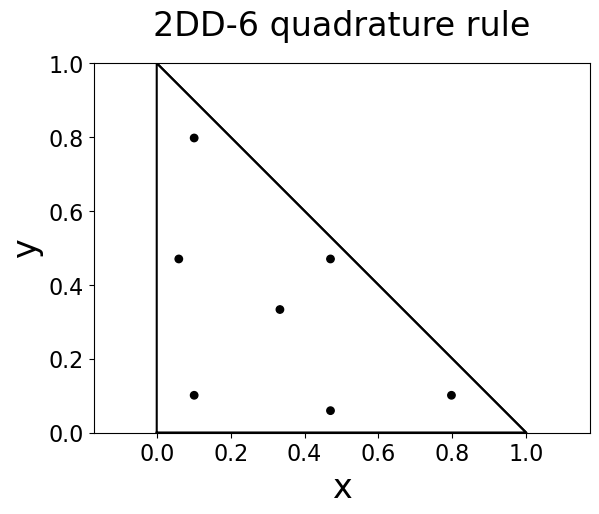

In [53]:
class Quad_point():
    def __init__(self, point: list, weight: float):
        self.point = point
        self.weight = weight

QUAD_POINTS_2DD_6 = [Quad_point([(6 - np.sqrt(15)) / 21, (6 - np.sqrt(15)) / 21], (155 - np.sqrt(15)) / 2400),
                        Quad_point([(9 + 2 * np.sqrt(15)) / 21, (6 - np.sqrt(15)) / 21], (155 - np.sqrt(15)) / 2400),
                        Quad_point([(6 - np.sqrt(15)) / 21, (9 + 2 * np.sqrt(15)) / 21], (155 - np.sqrt(15)) / 2400),
                        Quad_point([(6 + np.sqrt(15)) / 21, (9 - 2 * np.sqrt(15)) / 21], (155 + np.sqrt(15)) / 2400),
                        Quad_point([(6 + np.sqrt(15)) / 21, (6 + np.sqrt(15)) / 21], (155 + np.sqrt(15)) / 2400),
                        Quad_point([(9 - 2 * np.sqrt(15)) / 21, (6 + np.sqrt(15)) / 21], (155 + np.sqrt(15)) / 2400),
                        Quad_point([1 / 3, 1 / 3], 9/80)]


# Create plot of the quad points
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='datalim')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

for quad_point in QUAD_POINTS_2DD_6:
    ax.add_patch(patches.Circle(quad_point.point, 0.01, color='black'))

# Plot unit triangle
plt.plot([0, 1, 0], [0, 0, 1], 'black')
plt.plot([0, 1, 0, 0], [0, 0, 1, 0], 'black')
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.title('2DD-6 quadrature rule', fontsize=24, pad=20)
ax.tick_params(axis='both', which='major', labelsize=16)



plt.show()


In [3]:
# Assuming randomFieldV and jacobianV are already defined
randomFieldV_4, jacobianV_4 = calculate_vector_field_eigenpairs(4)

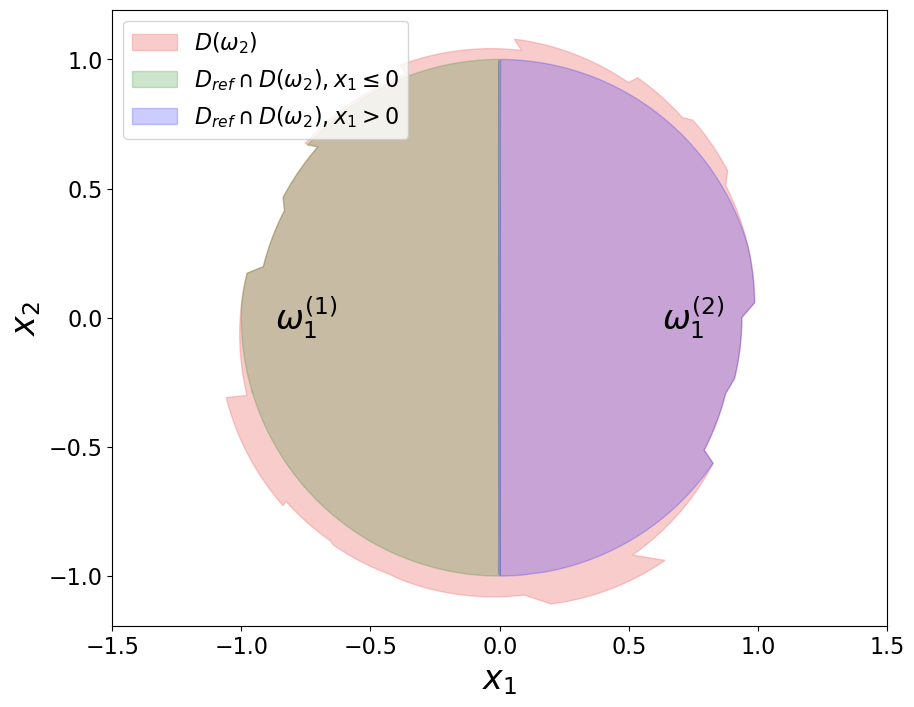

In [8]:
# used different xi for plot
xi = np.random.uniform(-np.sqrt(6), np.sqrt(6), randomFieldV_4.J)
num_points = 1000
points = []
perturbed_points = []
for i in range(num_points):
    point = np.array([np.cos(2 * np.pi * i / num_points), np.sin(2 * np.pi * i / num_points)])
    points.append(point)
    perturbed_points.append(randomFieldV_4(point, xi))

left_semi_circle = []
right_semi_circle = []
for i in range(num_points):
    if perturbed_points[i][0] < 0:
        if np.linalg.norm(perturbed_points[i]) <= 1:
            left_semi_circle.append(perturbed_points[i])
        else:
            left_semi_circle.append(perturbed_points[i] / np.linalg.norm(perturbed_points[i]))
    else:
        if np.linalg.norm(perturbed_points[i]) <= 1:
            right_semi_circle.append(perturbed_points[i])
        else:
            right_semi_circle.append(perturbed_points[i] / np.linalg.norm(perturbed_points[i]))

# Sort right semi circle points by y coordinate
right_semi_circle = sorted(right_semi_circle, key=lambda x: x[1])

for i in range(num_points):
    left_semi_circle.append(np.array([0, i/num_points]))
    right_semi_circle.append(np.array([0, i/num_points]))
    left_semi_circle.append(np.array([0, - i/num_points]))
    right_semi_circle.append(np.array([0, - i/num_points]))

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='datalim')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

# Plot the original circle
# for i in range(num_points):
#     plt.plot([points[i][0], perturbed_points[i][0]], [points[i][1], perturbed_points[i][1]], 'black')

# Convert perturbed points to a numpy array
points = np.array(points)
perturbed_points = np.array(perturbed_points)
left_semi_circle = np.array(left_semi_circle)
right_semi_circle = np.array(right_semi_circle)


# Fill the space inside the perturbed circle
ax.fill(perturbed_points[:, 0], perturbed_points[:, 1], color='lightcoral', alpha=0.4, label=r'$D(\omega_2)$')
# ax.fill(points[:, 0], points[:, 1], color='red', alpha=0.2, label='Unit circle')
ax.fill(left_semi_circle[:, 0], left_semi_circle[:, 1], color='green', alpha=0.2, label=r'$D_{ref} \cap D(\omega_2), x_1 \leq 0$')
ax.fill(right_semi_circle[:, 0], right_semi_circle[:, 1], color='blue', alpha=0.2, label=r'$D_{ref} \cap D(\omega_2), x_1 > 0$')


ax.text(-0.75, 0, r'$\omega_1^{(1)}$', fontsize=24, ha='center', va='center')
ax.text(0.75, 0, r'$\omega_1^{(2)}$', fontsize=24, ha='center', va='center')

plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
# plt.title('Random right hand side f', fontsize=24, pad=20)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.legend(loc='upper left', fontsize=16)

plt.show()


In [3]:
from helpers import calculate_vector_field_eigenpairs
randomFieldV, jacobianV = calculate_vector_field_eigenpairs(10)
xi = np.random.uniform(-np.sqrt(3), np.sqrt(3), randomFieldV.J)

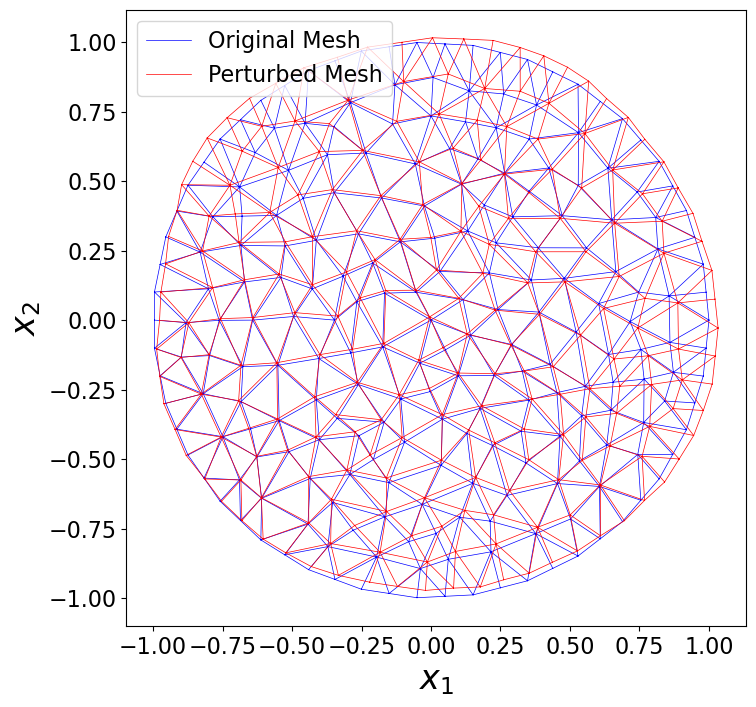

In [47]:
import numpy as np
import mshr
from helpers import DOMAIN, calculate_vector_field_eigenpairs
import fenics as fe
import matplotlib.pyplot as plt

mesh = mshr.generate_mesh(DOMAIN, 10)
# perturbed mesh based on the "original" mesh used for the KL-expansion
perturbed_coordinates = mesh.coordinates().copy()
for index, coordinate in enumerate(mesh.coordinates()):
    perturbed_coordinates[index] = randomFieldV(coordinate, xi)
# Create a new mesh with the perturbed coordinates
perturbed_mesh = fe.Mesh(mesh)
perturbed_mesh.coordinates()[:] = perturbed_coordinates

# Plot the original mesh and the perturbed mesh in one figure with different colors
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111)
fe.plot(mesh, color='blue', linewidth=0.5, label='Original Mesh')
fe.plot(perturbed_mesh, color='red', linewidth=0.5, label='Perturbed Mesh')
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
# plt.title(f"Original and Perturbed Mesh")
plt.show()

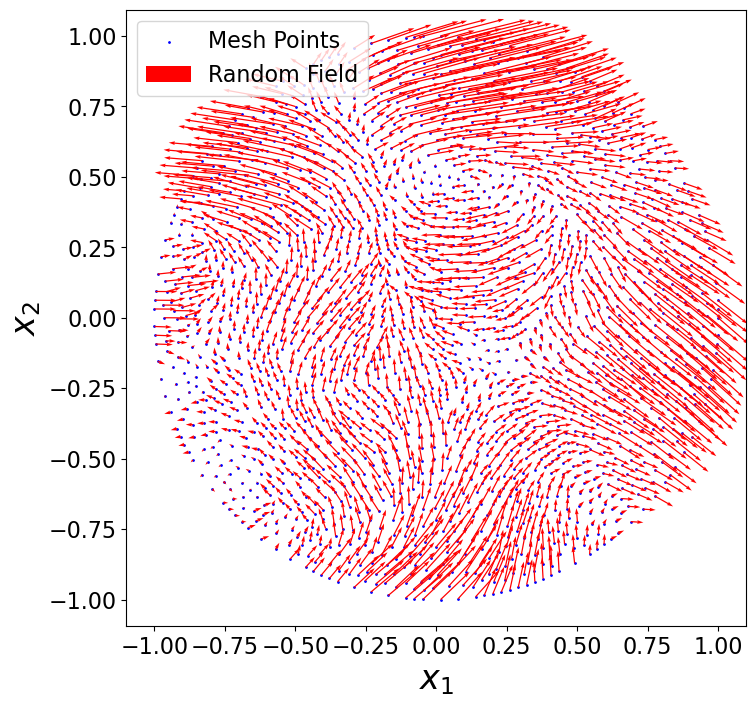

In [48]:
import mshr
import numpy as np
import matplotlib.pyplot as plt

mesh_coordinates = mshr.generate_mesh(DOMAIN, 32).coordinates()
random_field_values = np.array([randomFieldV(coord.copy(), xi) for coord in mesh_coordinates])
plt.figure(figsize=(8, 8))
plt.scatter(mesh_coordinates[:, 0], mesh_coordinates[:, 1], color='blue', s=1, label='Mesh Points')
plt.quiver(mesh_coordinates[:, 0], mesh_coordinates[:, 1],
           random_field_values[:, 0] - mesh_coordinates[:, 0],
           random_field_values[:, 1] - mesh_coordinates[:, 1],
           color='red', scale=0.3, scale_units='xy', angles='xy', width=0.002, label='Random Field')
# plt.title("Random Field on Mesh Points")
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
plt.legend(fontsize=16)
plt.axis('equal')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

            Solving linear variational problem.


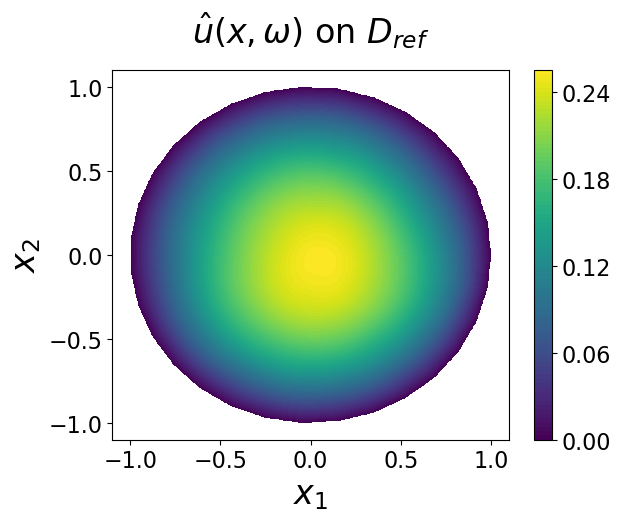

In [ ]:
# Poisson û
import mshr
import numpy as np
import matplotlib.pyplot as plt
from helpers import solve_poisson_for_given_sample, RHS_F, DOMAIN
from scipy.interpolate import griddata
import plotly.graph_objects as go
from matplotlib.ticker import MaxNLocator


u_sol = solve_poisson_for_given_sample(10, jacobianV, xi, RHS_F)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1:1:500j, -1:1:500j]
u_sols = []

for i in range(len(x_coords)):
    u_sols.append(u_sol(x_coords[i], y_coords[i]))

grid_z = griddata((x_coords, y_coords), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
plt.title(r'$\hat{u}(x, \omega)$ on $D_{ref}$', fontsize=24, pad=20)
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

            Solving linear variational problem.


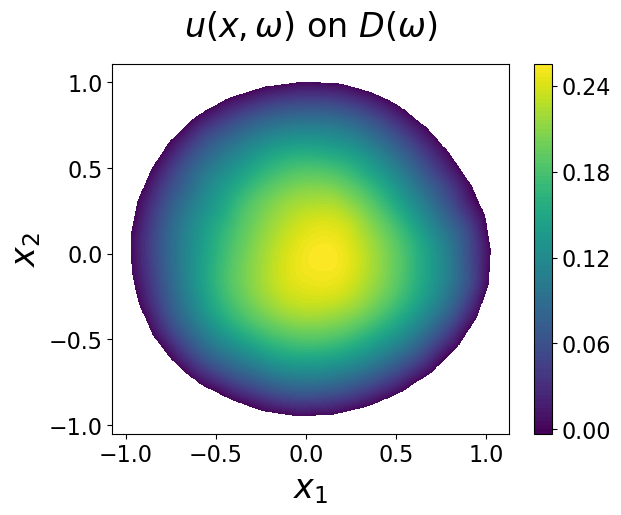

In [ ]:
# Poisson u
import mshr
import numpy as np
import matplotlib.pyplot as plt
from helpers import solve_poisson_for_given_sample, RHS_F, DOMAIN, inverse_mapping
from scipy.interpolate import griddata
import plotly.graph_objects as go
import fenics as fe
from matplotlib.ticker import MaxNLocator


u_sol = solve_poisson_for_given_sample(10, jacobianV, xi, RHS_F)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1.5:1.5:500j, -1.5:1.5:500j]
u_sols = []
x_coords_perturbed = []
y_coords_perturbed = []

for i in range(len(x_coords)):
    P_hat = fe.Point(x_coords[i], y_coords[i])
    x_coords_perturbed.append(randomFieldV(P_hat, xi)[0])
    y_coords_perturbed.append(randomFieldV(P_hat, xi)[1])
    u_sols.append(u_sol(P_hat))


grid_z = griddata((x_coords_perturbed, y_coords_perturbed), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([np.min(x_coords_perturbed) - 0.1, np.max(x_coords_perturbed) + 0.1])
ax.set_ylim([np.min(y_coords_perturbed) - 0.1, np.max(y_coords_perturbed) + 0.1])
plt.title(r'$u(x, \omega)$ on $D(\omega)$', fontsize=24, pad=20)
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
from helpers import calculate_vector_field_eigenpairs
randomFieldV, jacobianV = calculate_vector_field_eigenpairs(10)

In [9]:
xi = np.random.uniform(-np.sqrt(3), np.sqrt(3), randomFieldV.J)
F = np.random.random(2)

Solving linear variational problem.


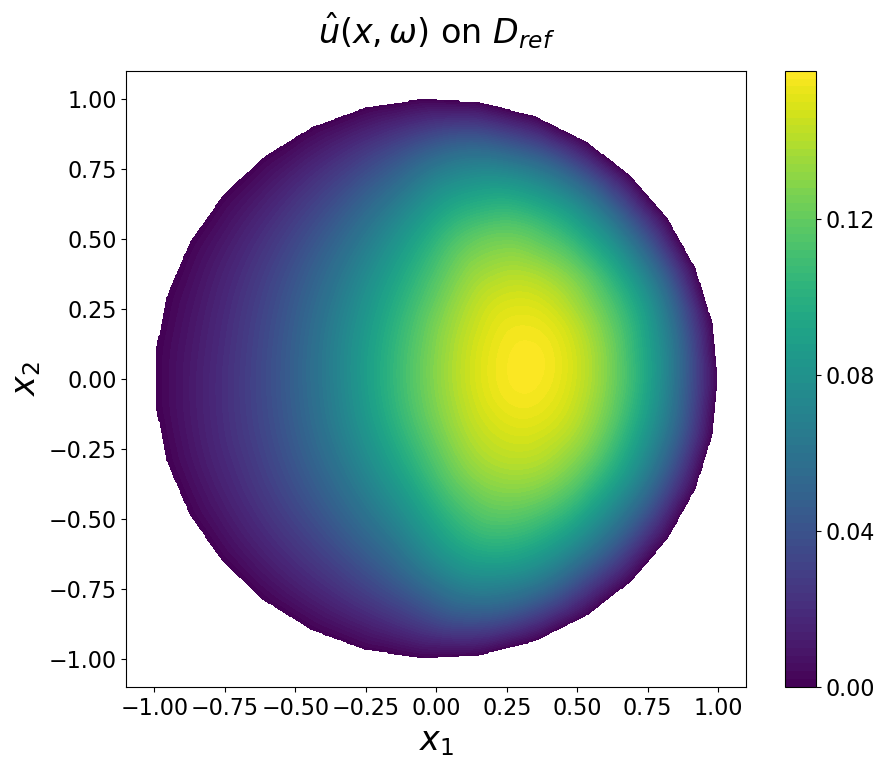

F: [0.05314122 0.97938946]


In [10]:
# Poisson rhs random û
import mshr
import numpy as np
import matplotlib.pyplot as plt
from helpers import DOMAIN
from helpers_rhs_random import solve_poisson_for_given_sample_rhs_random
from scipy.interpolate import griddata
import plotly.graph_objects as go
from matplotlib.ticker import MaxNLocator


u_sol = solve_poisson_for_given_sample_rhs_random(10, jacobianV, xi, F)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1:1:500j, -1:1:500j]
u_sols = []

for i in range(len(x_coords)):
    u_sols.append(u_sol(x_coords[i], y_coords[i]))

grid_z = griddata((x_coords, y_coords), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
plt.title(r'$\hat{u}(x, \omega)$ on $D_{ref}$', fontsize=24, pad=20)
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

print(f"F: {F}")

Solving linear variational problem.


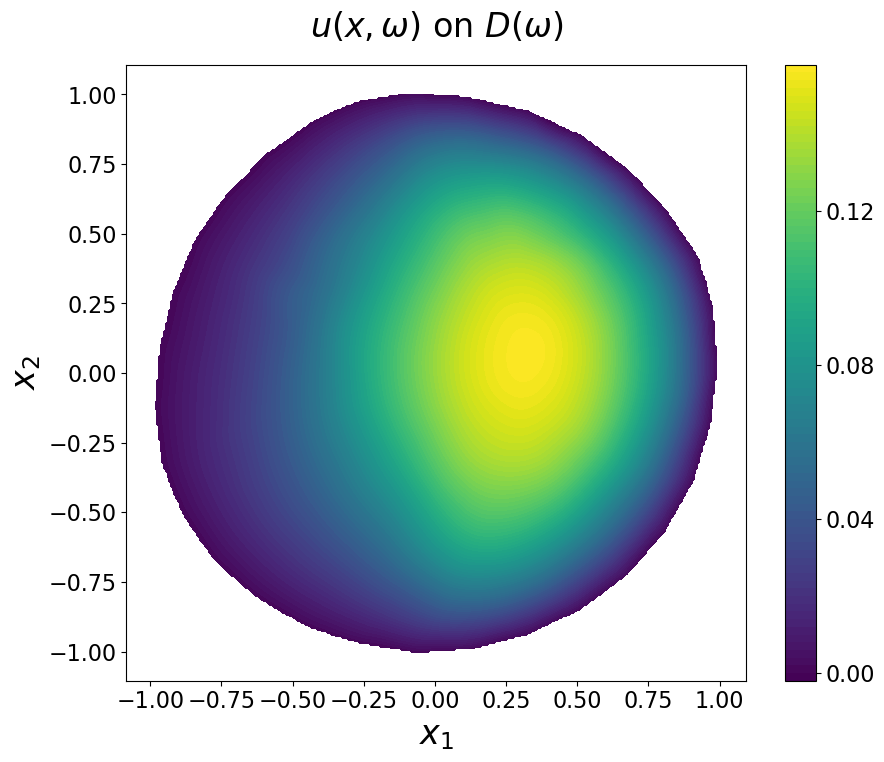

F: [0.05314122 0.97938946]


In [11]:
# Poisson rhs random u
import mshr
import numpy as np
import matplotlib.pyplot as plt
from helpers import DOMAIN, inverse_mapping
from helpers_rhs_random import solve_poisson_for_given_sample_rhs_random
from scipy.interpolate import griddata
import plotly.graph_objects as go
import fenics as fe
from matplotlib.ticker import MaxNLocator


u_sol = solve_poisson_for_given_sample_rhs_random(10, jacobianV, xi, F)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1.5:1.5:500j, -1.5:1.5:500j]
u_sols = []
x_coords_perturbed = []
y_coords_perturbed = []

for i in range(len(x_coords)):
    P_hat = fe.Point(x_coords[i], y_coords[i])
    x_coords_perturbed.append(randomFieldV(P_hat, xi)[0])
    y_coords_perturbed.append(randomFieldV(P_hat, xi)[1])
    u_sols.append(u_sol(P_hat))


grid_z = griddata((x_coords_perturbed, y_coords_perturbed), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([np.min(x_coords_perturbed) - 0.1, np.max(x_coords_perturbed) + 0.1])
ax.set_ylim([np.min(y_coords_perturbed) - 0.1, np.max(y_coords_perturbed) + 0.1])
plt.title(r'$u(x, \omega)$ on $D(\omega)$', fontsize=24, pad=20)
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
print(f"F: {F}")

In [ ]:
from helpers_diffusion import z_cov, z_calculate_random_field_eigenpairs
randomFieldZ = z_calculate_random_field_eigenpairs(10, z_cov)

In [15]:
xi_v = np.random.uniform(-np.sqrt(3), np.sqrt(3), randomFieldV.J)
xi_z = np.random.uniform(-np.sqrt(3), np.sqrt(3), randomFieldZ.J)

  Solving linear variational problem.


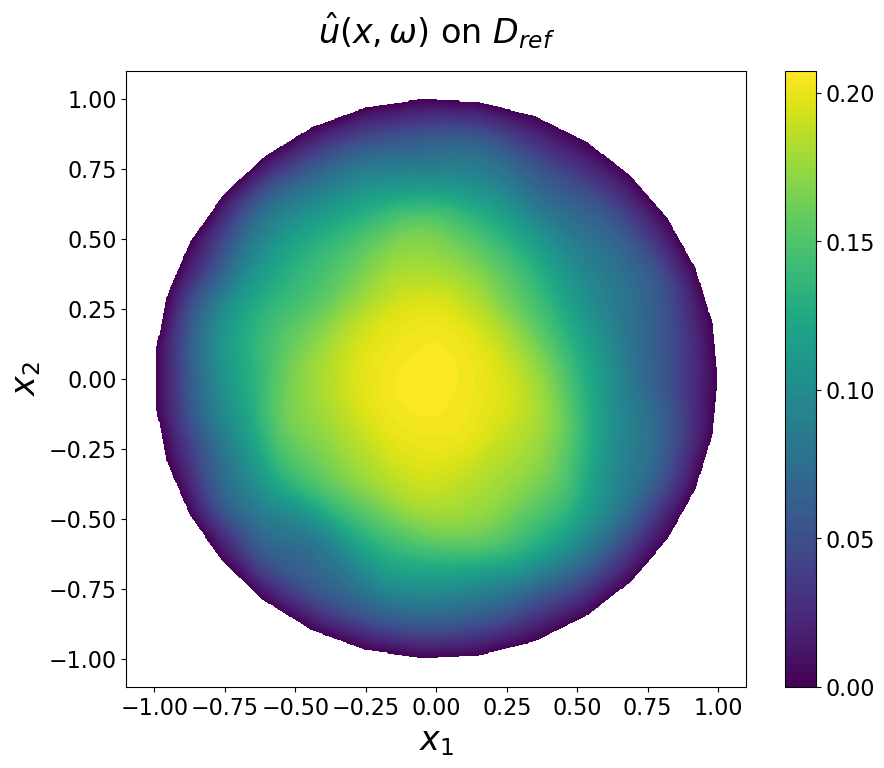

In [16]:
# Diffusion û
import mshr
import numpy as np
import matplotlib.pyplot as plt
from helpers import DOMAIN, RHS_F
from helpers_diffusion import solve_diffusion_poisson_for_given_sample
from scipy.interpolate import griddata
import plotly.graph_objects as go
from matplotlib.ticker import MaxNLocator


u_sol = solve_diffusion_poisson_for_given_sample(10, RHS_F, randomFieldV, jacobianV, randomFieldZ, xi_v, xi_z)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1:1:500j, -1:1:500j]
u_sols = []

for i in range(len(x_coords)):
    u_sols.append(u_sol(x_coords[i], y_coords[i]))

grid_z = griddata((x_coords, y_coords), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
plt.title(r'$\hat{u}(x, \omega)$ on $D_{ref}$', fontsize=24, pad=20)
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

  Solving linear variational problem.


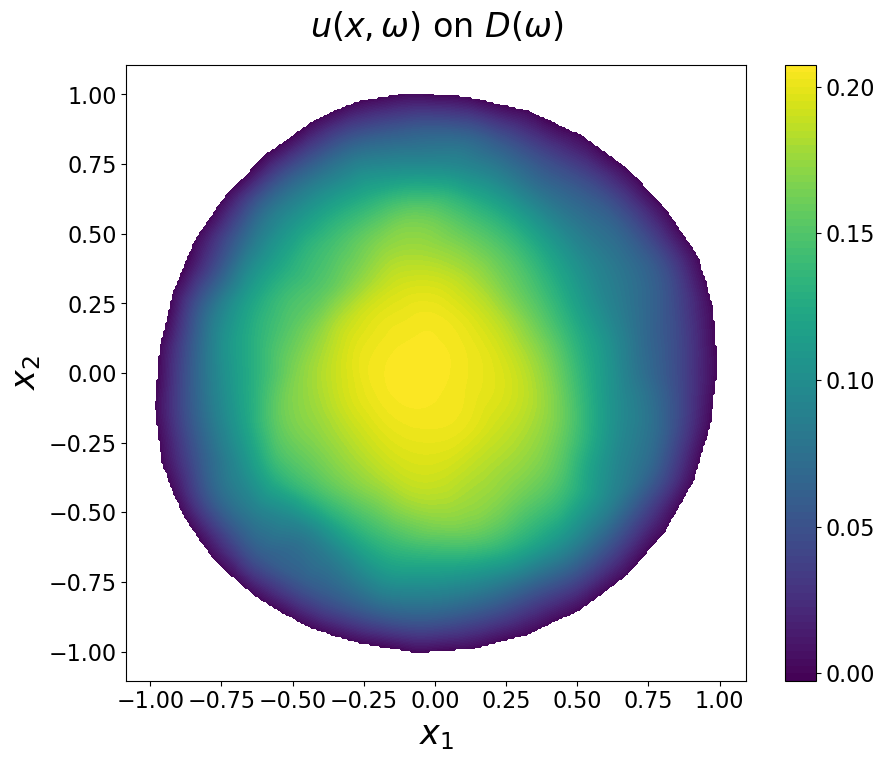

In [17]:
# Diffusion u
import mshr
import numpy as np
import matplotlib.pyplot as plt
from helpers import DOMAIN, RHS_F, inverse_mapping
from helpers_diffusion import solve_diffusion_poisson_for_given_sample
from scipy.interpolate import griddata
import plotly.graph_objects as go
import fenics as fe
from matplotlib.ticker import MaxNLocator


u_sol = solve_diffusion_poisson_for_given_sample(10, RHS_F, randomFieldV, jacobianV, randomFieldZ, xi_v, xi_z)

mesh = mshr.generate_mesh(DOMAIN, 10)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[-1.5:1.5:500j, -1.5:1.5:500j]
u_sols = []
x_coords_perturbed = []
y_coords_perturbed = []

for i in range(len(x_coords)):
    P_hat = fe.Point(x_coords[i], y_coords[i])
    x_coords_perturbed.append(randomFieldV(P_hat, xi)[0])
    y_coords_perturbed.append(randomFieldV(P_hat, xi)[1])
    u_sols.append(u_sol(P_hat))


grid_z = griddata((x_coords_perturbed, y_coords_perturbed), u_sols, (grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
ax.set_xlim([np.min(x_coords_perturbed) - 0.1, np.max(x_coords_perturbed) + 0.1])
ax.set_ylim([np.min(y_coords_perturbed) - 0.1, np.max(y_coords_perturbed) + 0.1])
plt.title(r'$u(x, \omega)$ on $D(\omega)$', fontsize=24, pad=20)
plt.xlabel(r'$x_1$', fontsize=24)
plt.ylabel(r'$x_2$', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()